# IMPORTS

In [2]:

from numpy.random import seed
seed(888)
from tensorflow.random import set_seed
set_seed(404)
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import img_to_array , load_img , array_to_img ,ImageDataGenerator
#from IPython.core.display import display
from keras.utils import to_categorical
from IPython.display import display
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

# CONSTANTS

In [3]:
x_train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')

In [4]:
y_train = x_train['label']
x_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = x_train.drop(columns = ['label',])

In [6]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
x_train.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

In [9]:
img = x_train.iloc[3]
img1 = img.values.reshape(28,28)

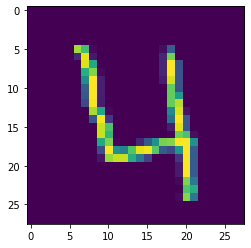

In [10]:
plt.imshow(img1)

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train.shape

(42000, 784)

In [12]:
y_cat_train = to_categorical(y_train,num_classes = 10)

In [13]:
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
model1 = Sequential()
model1.add(Dropout(0.2,seed=42,input_shape = (784,)))
model1.add( Dense(units = 128, activation='relu'))
model1.add(Dropout(0.2))
model1.add( Dense(units = 64, activation='relu'))
model1.add(Dropout(0.2))
model1.add( Dense(units = 32, activation='relu'))
model1.add( Dense(units = 10, activation='softmax'))
model1.compile(optimizer='adam' , loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [15]:
x_val = x_train.iloc[:5000]
y_val = y_train.iloc[:5000]

x_t = x_train.iloc[5000:]
y_t = y_train.iloc[5000:]
y_t.shape

(37000,)

In [16]:
history = model1.fit(x_train,y_train,epochs = 1,batch_size = 32)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.7994 - accuracy: 0.7415


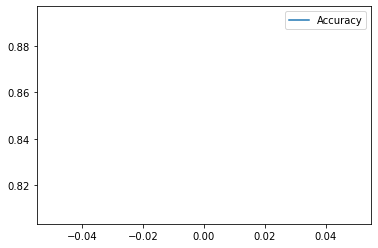

In [17]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy',])

In [58]:
x_te = x_test.values.reshape(x_test.shape[0],28,28,1)
y_pred = model.predict_classes(x_te)
y_pred

C:\Users\Ajinkya\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [59]:
y = list(y_pred
        )

In [60]:
pred_dict = []
for i in range(len(y)):
    d = {'ImageId':i+1,'Label':y[i]}
    pred_dict.append(d)


In [61]:
df = pd.DataFrame(pred_dict)
df.to_csv('submission.csv',index = False)

In [41]:

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.compile(optimizer='adam' , loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [42]:
x_t = x_train.values.reshape(x_train.shape[0],28,28,1)

In [43]:
y_t = y_train
y_t.shape

(42000,)

In [55]:
datagen = ImageDataGenerator(rotation_range = 5,)


In [57]:
model.fit_generator(datagen.flow(x_t, y_t, batch_size = 256), steps_per_epoch = len(x_train) // 256,
 epochs = 15)

Epoch 1/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0411 - accuracy: 0.9864
Epoch 2/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 3/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0423 - accuracy: 0.9868
Epoch 4/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0400 - accuracy: 0.9868
Epoch 5/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0419 - accuracy: 0.9870
Epoch 6/15
164/164 [==============================] - 11s 66ms/step - loss: 0.0382 - accuracy: 0.9882
Epoch 7/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0356 - accuracy: 0.9879
Epoch 8/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 9/15
164/164 [==============================] - 11s 67ms/step - loss: 0.0386 - accuracy: 0.9879
Epoch 10/15
164/164 [==============================] - 11s 68ms/step - loss: 0.038

pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\Ajinkya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
